# Proyecto final Modelos II
## Jose Miguel Monsalve Marin
## Miguel Angel Agudelo Vera
## Esteban Luna Seña




#### Instalación de kaggle

Se instala kaggle en el entorno virtual, se le dan permisos al token de kaggle

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.3/256.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 7.1 MB/s eta 0:00:00
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


#### Importaciones de librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#### Importe del dataset de Kaggle y extracción del CSV

In [3]:
!kaggle datasets download -d rabieelkharoua/predict-pet-adoption-status-dataset
!unzip *.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/43.6k [00:00<?, ?B/s]
100% 43.6k/43.6k [00:00<00:00, 79.1MB/s]
Archive:  predict-pet-adoption-status-dataset.zip
  inflating: pet_adoption_data.csv   


### Exploración de los datos

#### Creación del dataframe de pandas y revisión de datos

In [4]:
df = pd.read_csv("pet_adoption_data.csv")
print(df.head())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

In [5]:
# Visualización de las columnas del dataset
df.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [6]:
# Tipos de datos de todas las columnas del dataset
df.dtypes

,0
PetID,int64
PetType,object
Breed,object
AgeMonths,int64
Color,object
Size,object
WeightKg,float64
Vaccinated,int64
HealthCondition,int64
TimeInShelterDays,int64


In [7]:
# Descripción de las variables numéricas que no son binarias
df[['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']].describe()

,AgeMonths,WeightKg,TimeInShelterDays,AdoptionFee
count,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,43.974091,249.142003
std,52.148363,8.327749,25.740253,142.887040
min,1.000000,1.018198,1.000000,0.000000
25%,48.000000,8.730396,21.000000,127.000000
50%,94.000000,15.925416,45.000000,242.000000
75%,138.000000,22.737180,66.000000,375.000000
max,179.000000,29.995628,89.000000,499.000000


##### Análisis datos anteriores
Según los datos anteriores, podemos observar que para:
- AgeMonths: No se observa un sesgo evidente. La media y la mediana se encuentran en un valor parecido. No tenemos valores de 0.
- WeightKg: Se puede observar que tampoco hay un sesgo evidente hacia algún lado de la distribución, ya que la media y la mediana están en un valor muy parecido. No tenemos valores de 0.
- TimeInShelterDays: La distribución de los datos se da entre 1 y 89. No se evidencia un sesgo grande hacia algún lado de la distribución.
- AdoptionFee: Presenta valores de cero. No muestra sesgo evidente.

#### Conteo de datos faltantes en el dataset

In [8]:
df_null = df.isnull()
df_na = df.isna()
conteo_faltantes = df_null.sum(axis=0)
conteo_na = df_na.sum(axis = 0)
conteo_faltantes

,0
PetID,0
PetType,0
Breed,0
AgeMonths,0
Color,0
Size,0
WeightKg,0
Vaccinated,0
HealthCondition,0
TimeInShelterDays,0


El dataset no cuenta con valores nulos o faltantes

# Análisis de valores únicos

## Verificamos cuales son los datos únicos en las columnas del dataset que no hemos descrito previamente

In [9]:
print("Valores únicos en PetType: ", np.unique(df.PetType))
print("Valores únicos en Breed: ", np.unique(df.Breed))
print("Valores únicos en Color: ", np.unique(df.Color))
print("Valores únicos en Size: ", np.unique(df.Size))
print("Valores únicos en Vaccinated: ", np.unique(df.Vaccinated))
print("Valores únicos en HealthCondition: ", np.unique(df.HealthCondition))
print("Valores únicos en PreviousOwner: ", np.unique(df.PreviousOwner))
print("Valores únicos en AdoptionLikelihood: ", np.unique(df.AdoptionLikelihood))

Valores únicos en PetType:  ['Bird' 'Cat' 'Dog' 'Rabbit']
Valores únicos en Breed:  ['Golden Retriever' 'Labrador' 'Parakeet' 'Persian' 'Poodle' 'Rabbit'
 'Siamese']
Valores únicos en Color:  ['Black' 'Brown' 'Gray' 'Orange' 'White']
Valores únicos en Size:  ['Large' 'Medium' 'Small']
Valores únicos en Vaccinated:  [0 1]
Valores únicos en HealthCondition:  [0 1]
Valores únicos en PreviousOwner:  [0 1]
Valores únicos en AdoptionLikelihood:  [0 1]


#### Gráfica de los datos

##### Datos categóricos


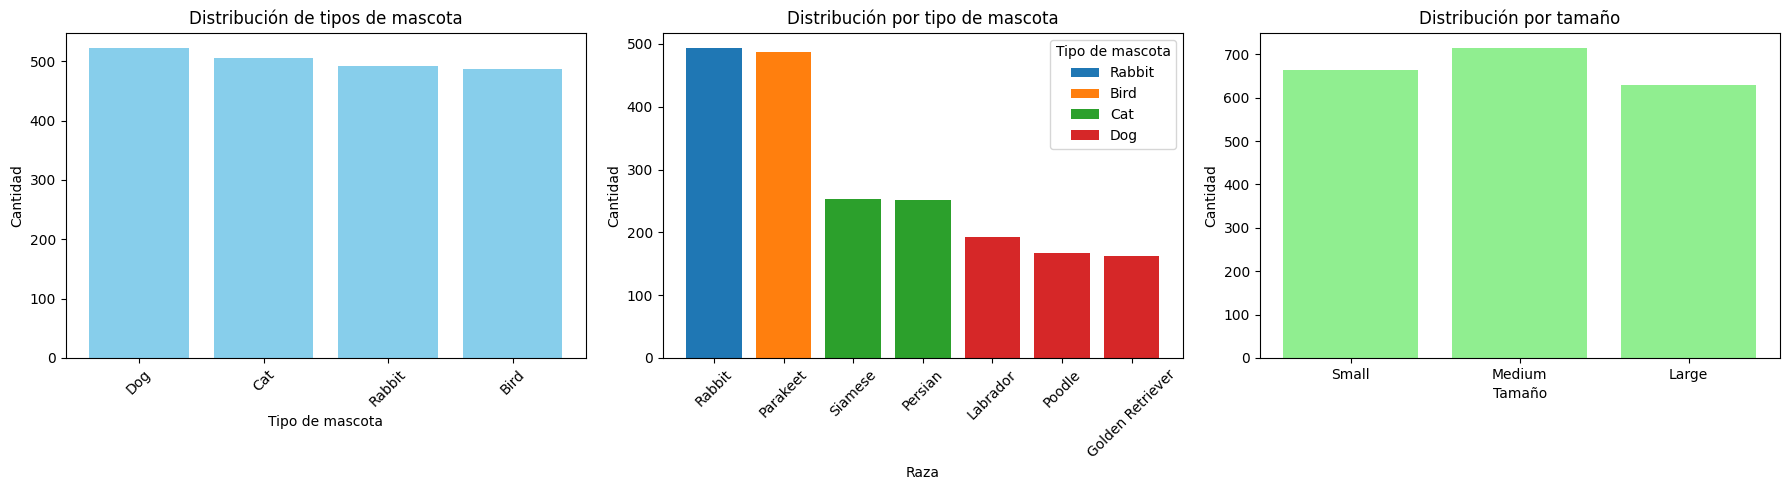

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

pet_counts = df['PetType'].value_counts()
axes[0].bar(pet_counts.index, pet_counts.values, color='skyblue')
axes[0].set_title('Distribución de tipos de mascota')
axes[0].set_xlabel('Tipo de mascota')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=45)

breed_counts = df.groupby(['PetType', 'Breed']).size().reset_index(name='Count')
top_breeds = breed_counts.sort_values('Count', ascending=False).head(10)

for pet in top_breeds['PetType'].unique():
    subset = top_breeds[top_breeds['PetType'] == pet]
    axes[1].bar(subset['Breed'], subset['Count'], label=pet)

axes[1].set_title('Distribución por tipo de mascota')
axes[1].set_xlabel('Raza')
axes[1].set_ylabel('Cantidad')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Tipo de mascota')

size_order = ['Small', 'Medium', 'Large']
size_counts = df['Size'].value_counts().reindex(size_order)
axes[2].bar(size_counts.index, size_counts.values, color='lightgreen')
axes[2].set_title('Distribución por tamaño')
axes[2].set_xlabel('Tamaño')
axes[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


##### Datos numéricos

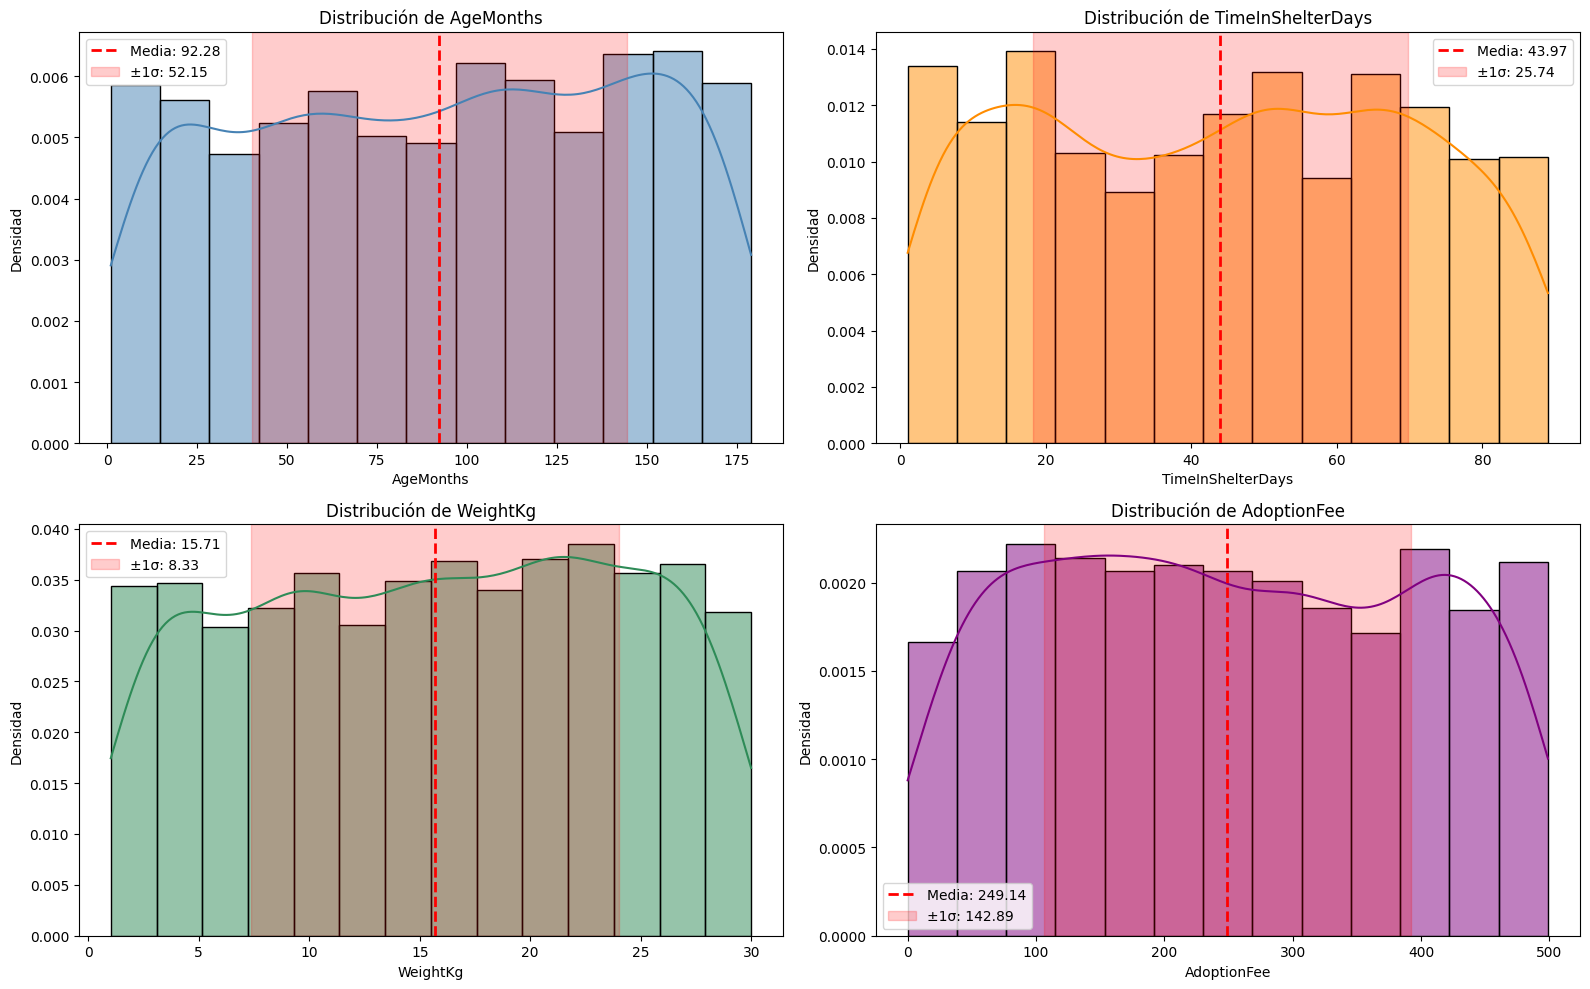

In [11]:
def plot_distribution(ax, data, label, color='dodgerblue'):
    sns.histplot(data, kde=True, ax=ax, color=color, stat='density', edgecolor='black')
    ax.set_title(f'Distribución de {label}')
    ax.set_xlabel(label)
    ax.set_ylabel('Densidad')

    # Línea de media y desvío
    mean = data.mean()
    std = data.std()
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1σ: {std:.2f}')
    ax.legend()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

plot_distribution(axes[0, 0], df['AgeMonths'], 'AgeMonths', color='steelblue')
plot_distribution(axes[0, 1], df['TimeInShelterDays'], 'TimeInShelterDays', color='darkorange')
plot_distribution(axes[1, 0], df['WeightKg'], 'WeightKg', color='seagreen')
plot_distribution(axes[1, 1], df['AdoptionFee'], 'AdoptionFee', color='purple')

plt.tight_layout()
plt.show()

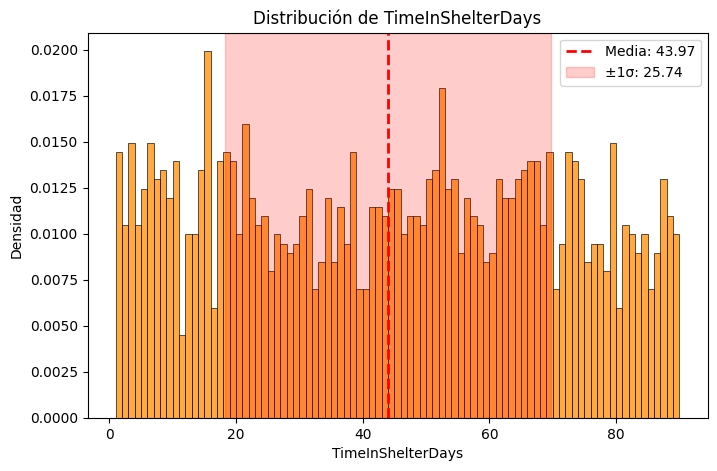

In [12]:
bins = range(int(df['TimeInShelterDays'].min()), int(df['TimeInShelterDays'].max()) + 2)

# Create a figure and axes for the plot
fig, axes = plt.subplots(1, 1, figsize=(8, 5)) # Create a single subplot for TimeInShelterDays

# Llamada modificada SOLO para TimeInShelterDays
sns.histplot(
    df['TimeInShelterDays'],
    bins=bins,
    kde=False,
    ax=axes, # Use the single axes
    color='darkorange',
    stat='density',
    edgecolor='black'
)
axes.set_title('Distribución de TimeInShelterDays')
axes.set_xlabel('TimeInShelterDays')
axes.set_ylabel('Densidad')

# Añadir media y desviación estándar
mean = df['TimeInShelterDays'].mean()
std = df['TimeInShelterDays'].std()
axes.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
axes.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1σ: {std:.2f}')
axes.legend()
plt.show()

##### Matriz de correlación entre las variables

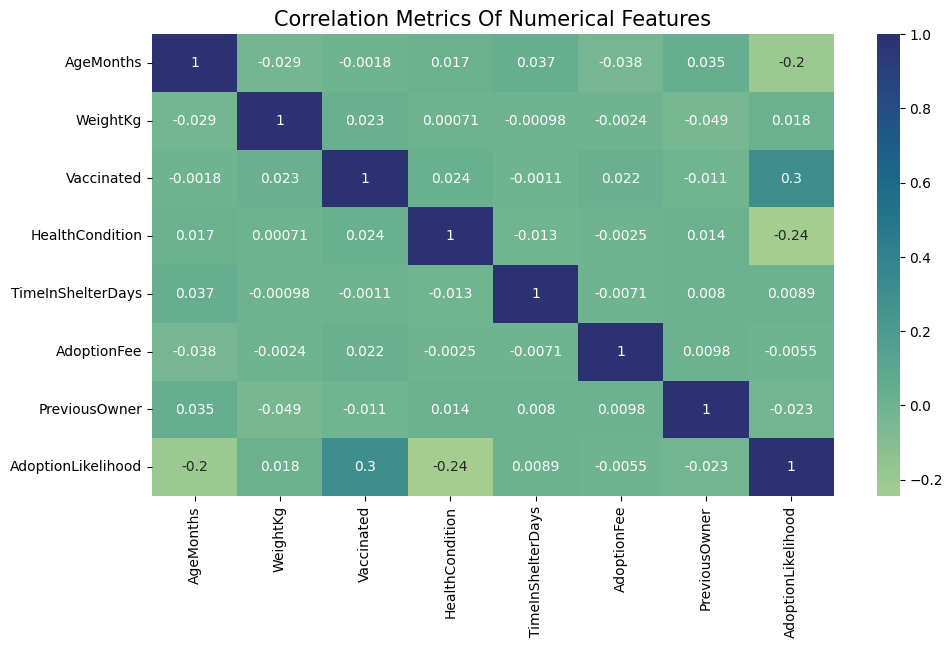

In [13]:
plt.figure(figsize=(11,6))
sns.heatmap(df.loc[:, df.columns != 'PetID'].corr(numeric_only=True),annot=True, cmap='crest')
plt.title('Correlation Metrics Of Numerical Features', fontsize=15)
plt.show()

##### Análisis de datos booleanos en relación con el tiempo que pasa una mascota en el albergue

/tmp/ipython-input-2492465265.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[0], palette='pastel')
/tmp/ipython-input-2492465265.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[1], palette='pastel', inner='quartile')
/tmp/ipython-input-2492465265.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[0], palette='pastel')
/tmp/ipython-input-2492465265.py:14: FutureWarni

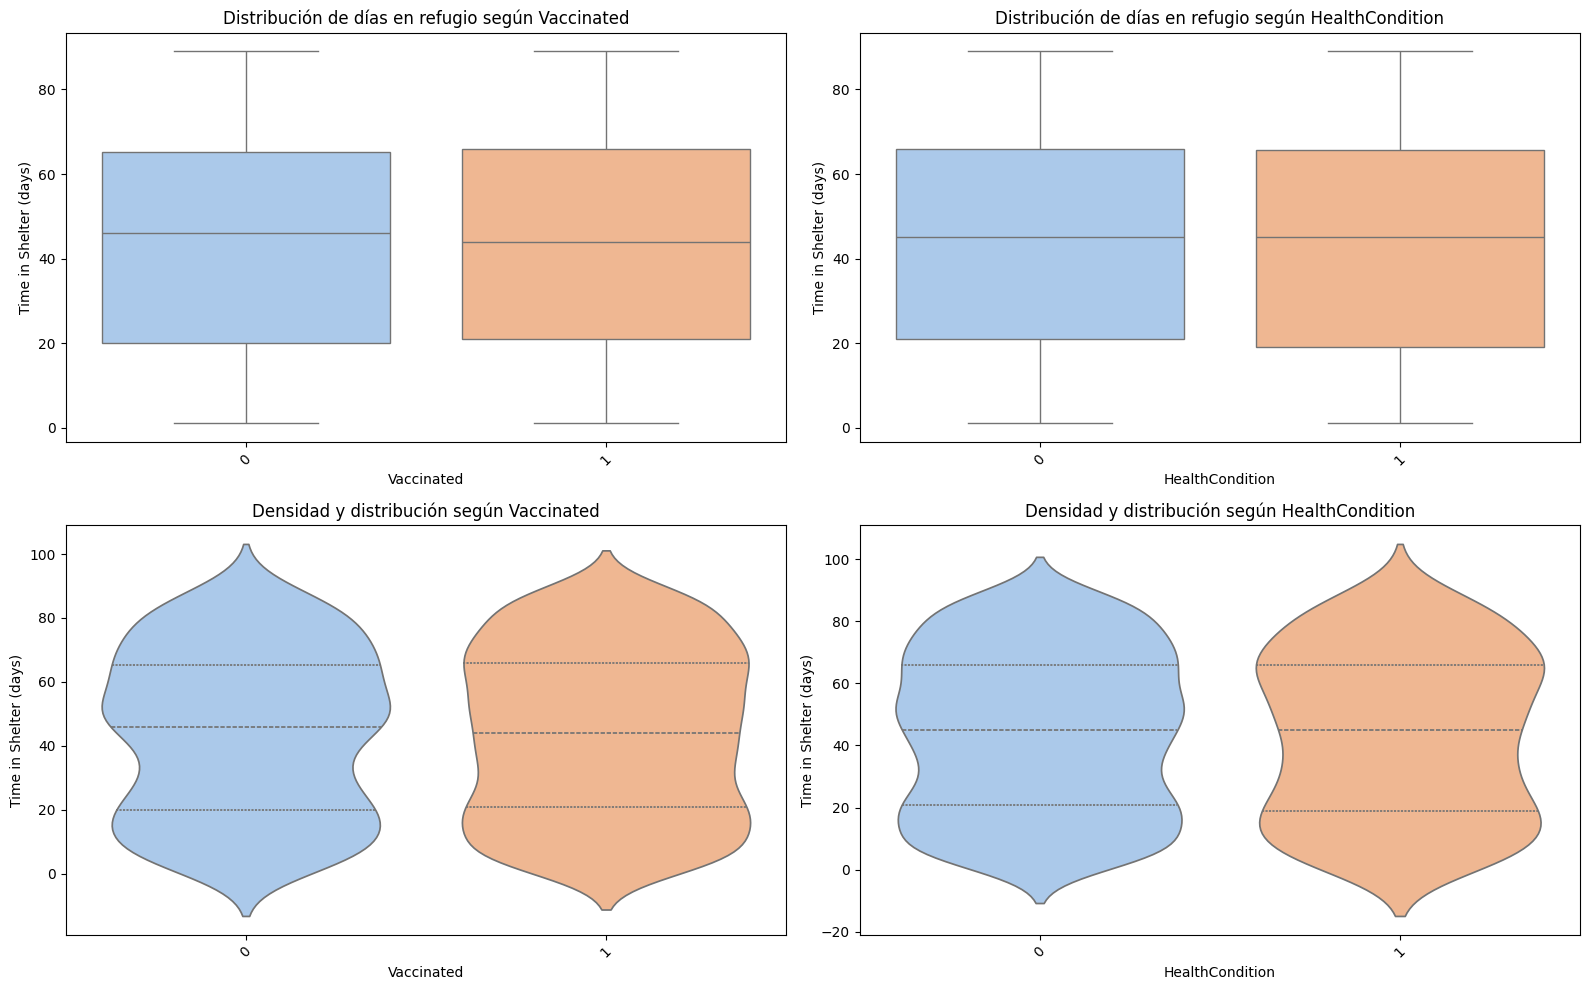

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_and_violin(df, feature_col, axes, color='skyblue'):
    # Boxplot
    sns.boxplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[0], palette='pastel')
    axes[0].set_title(f'Distribución de días en refugio según {feature_col}')
    axes[0].set_xlabel(feature_col)
    axes[0].set_ylabel('Time in Shelter (days)')
    axes[0].tick_params(axis='x', rotation=45)

    # Violinplot (opcional)
    sns.violinplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[1], palette='pastel', inner='quartile')
    axes[1].set_title(f'Densidad y distribución según {feature_col}')
    axes[1].set_xlabel(feature_col)
    axes[1].set_ylabel('Time in Shelter (days)')
    axes[1].tick_params(axis='x', rotation=45)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Graficar para 'Vaccinated'
plot_box_and_violin(df, 'Vaccinated', [axes[0, 0], axes[1, 0]])

# Graficar para 'HealthCondition'
plot_box_and_violin(df, 'HealthCondition', [axes[0, 1], axes[1, 1]])

plt.tight_layout()
plt.show()


##### Datos que corresponden a booleanos

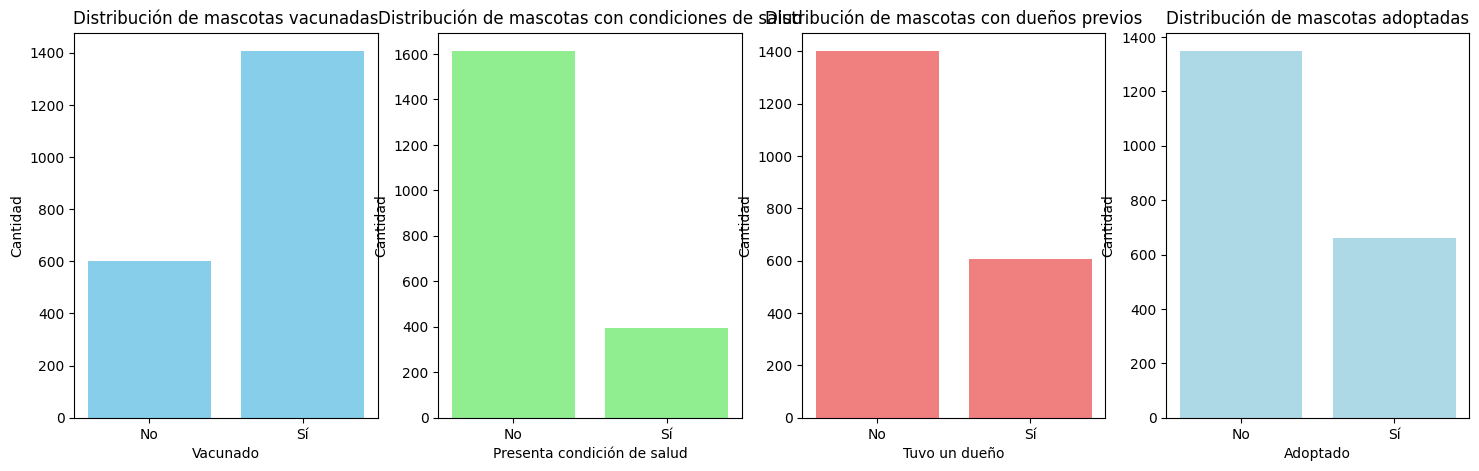

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

Vaccinated
1    1407
0     600
Name: count, dtype: int64

HealthCondition
0    1613
1     394
Name: count, dtype: int64

PreviousOwner
0    1401
1     606
Name: count, dtype: int64


In [15]:
def plot_boolean_column(df, column, position, title, xlabel, color):
  column_counts = df[column].value_counts()
  axes[position].bar(column_counts.index, column_counts.values, color=color)
  axes[position].set_title(title)
  axes[position].set_xlabel(xlabel)
  axes[position].set_ylabel('Cantidad')
  axes[position].set_xticks([0, 1])
  axes[position].set_xticklabels(['No', 'Sí'])
  axes[position].tick_params(axis='x', rotation=0)

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

plot_boolean_column(df, 'Vaccinated', 0, 'Distribución de mascotas vacunadas', 'Vacunado', 'skyblue')
plot_boolean_column(df, 'HealthCondition', 1, 'Distribución de mascotas con condiciones de salud', 'Presenta condición de salud', 'lightgreen')
plot_boolean_column(df, 'PreviousOwner', 2, 'Distribución de mascotas con dueños previos', 'Tuvo un dueño', 'lightcoral')
plot_boolean_column(df, 'AdoptionLikelihood', 3, 'Distribución de mascotas adoptadas', 'Adoptado', 'lightblue')

plt.show()

print(df['AdoptionLikelihood'].value_counts())
print()
print(df['Vaccinated'].value_counts())
print()
print(df['HealthCondition'].value_counts())
print()
print(df['PreviousOwner'].value_counts())

### Preprocesado de los datos

Estadísticas descriptivas:

         AgeMonths     WeightKg  AdoptionFee  TimeInShelterDays
count  2007.000000  2007.000000  2007.000000        2007.000000
mean     92.279522    15.705776   249.142003          43.974091
std      52.148363     8.327749   142.887040          25.740253
min       1.000000     1.018198     0.000000           1.000000
25%      48.000000     8.730396   127.000000          21.000000
50%      94.000000    15.925416   242.000000          45.000000
75%     138.000000    22.737180   375.000000          66.000000
max     179.000000    29.995628   499.000000          89.000000


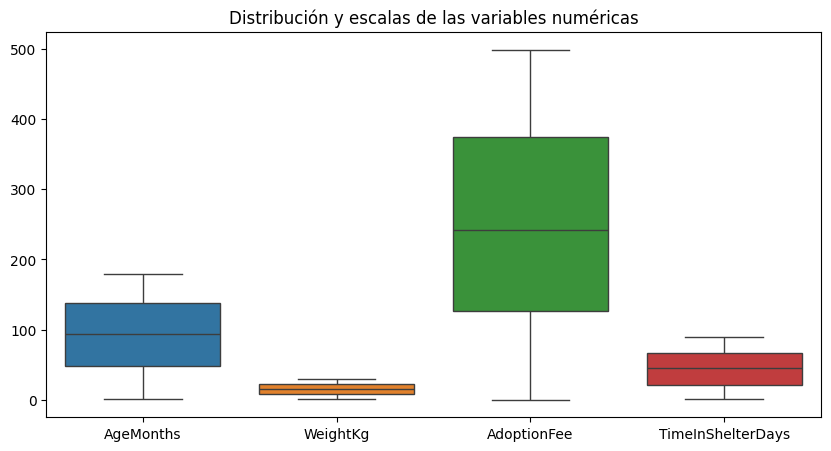


Rangos de cada variable (max - min):
AgeMonths: 178.00
WeightKg: 28.98
AdoptionFee: 499.00
TimeInShelterDays: 88.00


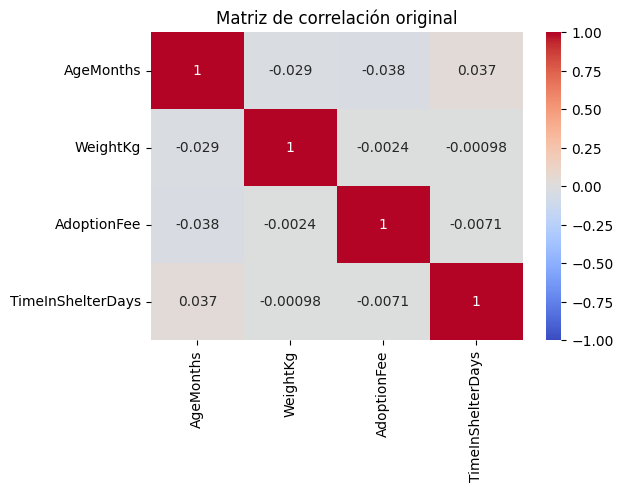

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ver resumen estadístico general
cols = ['AgeMonths', 'WeightKg', 'AdoptionFee', 'TimeInShelterDays']
print("Estadísticas descriptivas:\n")
print(df[cols].describe())

# Visualizar escalas
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[cols])
plt.title("Distribución y escalas de las variables numéricas")
plt.show()

# Revisar rangos relativos
print("\nRangos de cada variable (max - min):")
for c in cols:
    rango = df[c].max() - df[c].min()
    print(f"{c}: {rango:.2f}")

#(Opcional) Matriz de correlación antes de escalar
plt.figure(figsize=(6,4))
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación original")
plt.show()


Columnas y tipos de datos:
PetID                   int64
PetType                object
Breed                  object
AgeMonths               int64
Color                  object
Size                   object
WeightKg              float64
Vaccinated              int64
HealthCondition         int64
TimeInShelterDays       int64
AdoptionFee             int64
PreviousOwner           int64
AdoptionLikelihood      int64
dtype: object 

Estadísticas generales:

         AgeMonths     WeightKg  AdoptionFee  TimeInShelterDays
count  2007.000000  2007.000000  2007.000000        2007.000000
mean     92.279522    15.705776   249.142003          43.974091
std      52.148363     8.327749   142.887040          25.740253
min       1.000000     1.018198     0.000000           1.000000
25%      48.000000     8.730396   127.000000          21.000000
50%      94.000000    15.925416   242.000000          45.000000
75%     138.000000    22.737180   375.000000          66.000000
max     179.000000    29.99562

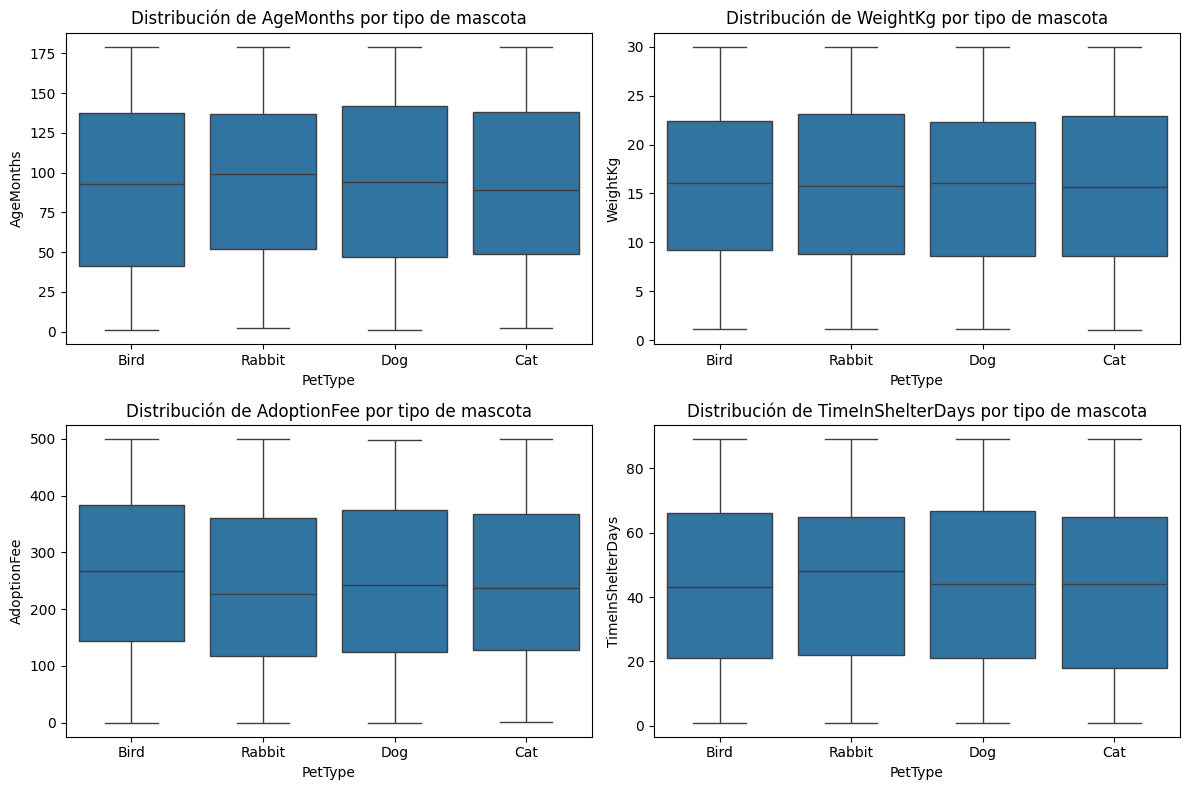

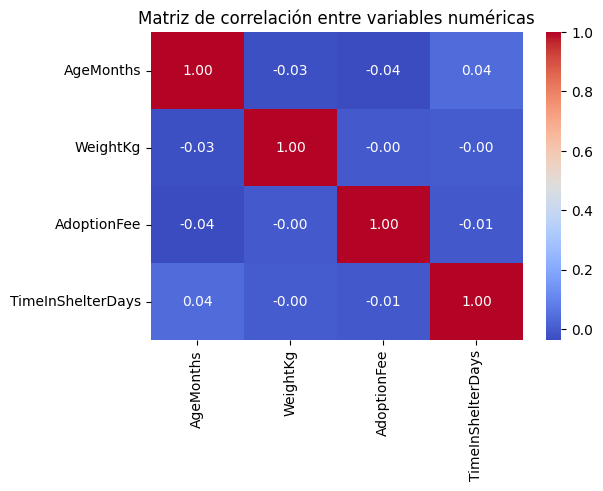

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (ajusta la ruta según tu archivo)
# df = pd.read_csv('nombre_del_archivo.csv')

# Ver estructura general
print("Columnas y tipos de datos:")
print(df.dtypes, "\n")

# Ver estadísticas generales de las variables numéricas
num_cols = ['AgeMonths', 'WeightKg', 'AdoptionFee', 'TimeInShelterDays']
print("Estadísticas generales:\n")
print(df[num_cols].describe(), "\n")

# Comparar por tipo de mascota (para ver si las escalas difieren entre grupos)
group_stats = df.groupby('PetType')[num_cols].agg(['mean', 'std', 'min', 'max'])
print("Estadísticas por tipo de mascota:\n")
print(group_stats, "\n")

# Graficar distribuciones de las variables numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='PetType', y=col)
    plt.title(f"Distribución de {col} por tipo de mascota")
plt.tight_layout()
plt.show()

# Ver correlación entre las variables numéricas (puede influir en la decisión)
plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()



In [18]:
variables_numericas = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']
COLUMNA_CATEGORICA = 'PetType'


print("Análisis de Rango y Dispersión General de Variables Numéricas ")

rango_dispersion = df[variables_numericas].agg(['min', 'max', 'mean', 'std', 'median']).T
rango_dispersion['Range'] = rango_dispersion['max'] - rango_dispersion['min']
rango_dispersion = rango_dispersion[['min', 'max', 'Range', 'mean', 'median', 'std']]
print(rango_dispersion.to_markdown(floatfmt=".2f"))


print("\nDispersión Agrupada por TipoDeMascota (AgeMonths y WeightKg) ")


variables_sensibles = ['AgeMonths', 'WeightKg']
rango_agrupado = df.groupby(COLUMNA_CATEGORICA)[variables_sensibles].agg(['min', 'max', 'mean', 'std']).unstack()
print(rango_agrupado.to_markdown(floatfmt=".2f"))

Análisis de Rango y Dispersión General de Variables Numéricas 
|                   |   min |    max |   Range |   mean |   median |    std |
|:------------------|------:|-------:|--------:|-------:|---------:|-------:|
| AgeMonths         |  1.00 | 179.00 |  178.00 |  92.28 |    94.00 |  52.15 |
| WeightKg          |  1.02 |  30.00 |   28.98 |  15.71 |    15.93 |   8.33 |
| TimeInShelterDays |  1.00 |  89.00 |   88.00 |  43.97 |    45.00 |  25.74 |
| AdoptionFee       |  0.00 | 499.00 |  499.00 | 249.14 |   242.00 | 142.89 |

Dispersión Agrupada por TipoDeMascota (AgeMonths y WeightKg) 
|                                 |      0 |
|:--------------------------------|-------:|
| ('AgeMonths', 'min', 'Bird')    |   1.00 |
| ('AgeMonths', 'min', 'Cat')     |   2.00 |
| ('AgeMonths', 'min', 'Dog')     |   1.00 |
| ('AgeMonths', 'min', 'Rabbit')  |   2.00 |
| ('AgeMonths', 'max', 'Bird')    | 179.00 |
| ('AgeMonths', 'max', 'Cat')     | 179.00 |
| ('AgeMonths', 'max', 'Dog')     | 179.00 |
|

#### Normalización de datos

In [19]:
from sklearn.preprocessing import StandardScaler

# Lista de variables a estandarizar
variables_numericas = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']

# 1. Crear el objeto StandardScaler
scaler = StandardScaler()

# 2. Aplicar fit_transform y reasignar (el método más limpio)
# Esto transforma las columnas para que tengan media ~0 y std ~1
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

print("Variables estandarizadas con éxito.")
print("Verifique el resultado (Media debe ser ~0, Std debe ser ~1):")
print(df[variables_numericas].describe().to_markdown(floatfmt=".2f"))

Variables estandarizadas con éxito.
Verifique el resultado (Media debe ser ~0, Std debe ser ~1):
|       |   AgeMonths |   WeightKg |   TimeInShelterDays |   AdoptionFee |
|:------|------------:|-----------:|--------------------:|--------------:|
| count |     2007.00 |    2007.00 |             2007.00 |       2007.00 |
| mean  |       -0.00 |       0.00 |               -0.00 |          0.00 |
| std   |        1.00 |       1.00 |                1.00 |          1.00 |
| min   |       -1.75 |      -1.76 |               -1.67 |         -1.74 |
| 25%   |       -0.85 |      -0.84 |               -0.89 |         -0.86 |
| 50%   |        0.03 |       0.03 |                0.04 |         -0.05 |
| 75%   |        0.88 |       0.84 |                0.86 |          0.88 |
| max   |        1.66 |       1.72 |                1.75 |          1.75 |


In [20]:
# Descripción de las variables numéricas que no son binarias
df[['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']].describe()

,AgeMonths,WeightKg,TimeInShelterDays,AdoptionFee
count,2.007000e+03,2.007000e+03,2.007000e+03,2.007000e+03
mean,-6.284073e-17,1.451532e-16,-7.169153e-17,6.195564e-18
std,1.000249e+00,1.000249e+00,1.000249e+00,1.000249e+00
min,-1.750818e+00,-1.764131e+00,-1.669945e+00,-1.744064e+00
25%,-8.493183e-01,-8.378156e-01,-8.927580e-01,-8.550282e-01
50%,3.300021e-02,2.638102e-02,3.986616e-02,-4.999602e-02
75%,8.769570e-01,8.445446e-01,8.559123e-01,8.810412e-01
max,1.663371e+00,1.716360e+00,1.749677e+00,1.749076e+00


#### Codificación de datos categóricos no ordinales

In [21]:
df['PetType'] = df['PetType'].astype("category")
df['Breed'] = df['Breed'].astype("category")
df['Color'] = df['Color'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PetID               2007 non-null   int64   
 1   PetType             2007 non-null   category
 2   Breed               2007 non-null   category
 3   AgeMonths           2007 non-null   float64 
 4   Color               2007 non-null   category
 5   Size                2007 non-null   object  
 6   WeightKg            2007 non-null   float64 
 7   Vaccinated          2007 non-null   int64   
 8   HealthCondition     2007 non-null   int64   
 9   TimeInShelterDays   2007 non-null   float64 
 10  AdoptionFee         2007 non-null   float64 
 11  PreviousOwner       2007 non-null   int64   
 12  AdoptionLikelihood  2007 non-null   int64   
dtypes: category(3), float64(4), int64(5), object(1)
memory usage: 163.6+ KB


In [22]:
codificador = OneHotEncoder()

cod_type = codificador.fit_transform(df[['PetType']])
columns_pettype = codificador.categories_[0]
cols_type = pd.DataFrame(cod_type.toarray(), columns=[f"PetType_{cat}" for cat in columns_pettype])
df = pd.concat([df, cols_type], axis='columns')

cod_breed = codificador.fit_transform(df[['Breed']])
columns_breed = codificador.categories_[0]
cols_breed = pd.DataFrame(cod_breed.toarray(), columns=[f"Breed_{b}" for b in columns_breed])
df = pd.concat([df, cols_breed], axis='columns')

cod_color = codificador.fit_transform(df[['Color']])
columns_color = codificador.categories_[0]
cols_color = pd.DataFrame(cod_color.toarray(), columns=[f"Color_{c}" for c in columns_color])
df = pd.concat([df, cols_color], axis='columns')

In [23]:
df.drop("PetID", axis='columns', inplace=True)
df.drop("PetType", axis='columns', inplace=True)
df.drop("Breed", axis='columns', inplace=True)
df.drop("Color", axis='columns', inplace=True)

In [24]:
df

,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_Bird,...,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White
0,0.742691,Large,-1.281098,1,0,-0.659602,-0.764025,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.369797,Large,0.045756,0,0,-1.397929,-0.098998,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.838595,Medium,-1.637043,0,0,1.594240,0.951044,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.090543,Small,-1.485328,0,0,0.661616,-0.225003,1,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.589244,Large,0.575608,0,0,-0.620743,-1.646060,1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,-0.388978,Small,1.361243,1,0,0.855912,-1.562056,1,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2003,0.608425,Small,-1.318671,1,1,0.583897,-0.694022,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2004,0.397436,Small,-1.675202,1,0,0.933631,0.370021,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2005,-1.539828,Large,0.631278,1,0,0.583897,1.602070,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
df.columns

Index(['AgeMonths', 'Size', 'WeightKg', 'Vaccinated', 'HealthCondition',
       'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner',
       'AdoptionLikelihood', 'PetType_Bird', 'PetType_Cat', 'PetType_Dog',
       'PetType_Rabbit', 'Breed_Golden Retriever', 'Breed_Labrador',
       'Breed_Parakeet', 'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit',
       'Breed_Siamese', 'Color_Black', 'Color_Brown', 'Color_Gray',
       'Color_Orange', 'Color_White'],
      dtype='object')

#### Codificación de datos categóricos ordinales

In [26]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

size_categories = ["Small", "Medium", "Large"]
ordencoder = OrdinalEncoder(categories=[size_categories])
df['Size_Encoded'] = ordencoder.fit_transform(df[['Size']])



In [27]:
df['Size_Encoded'].head()

,Size_Encoded
0,2.0
1,2.0
2,1.0
3,0.0
4,2.0


Borramos también la columna Breed_Rabbit y Breed_Parakeet ya que expresa lo mismo que PetType_Rabbit y PetType_Bird respectivamente, por lo que es información redundante

In [28]:
df.drop("Size", axis='columns', inplace=True)
df.drop("Breed_Rabbit", axis='columns', inplace=True)

In [29]:
df.drop("Breed_Parakeet", axis='columns', inplace=True)

eliminar una columna dummy de cada grupo de variables One-Hot codificadas para evitar la Multicolinealidad Perfecta

In [30]:
# Columnas a eliminar para evitar la Trampa de la Dummy Variable
columnas_a_eliminar_dummies = [
    'PetType_Rabbit',
    'Breed_Persian',
    'Color_White'
]

# Eliminar las columnas redundantes del DataFrame
df = df.drop(columnas_a_eliminar_dummies, axis=1, errors='ignore')

print("Las columnas redundantes (dummies) han sido eliminadas para prevenir la multicolinealidad perfecta.")


Las columnas redundantes (dummies) han sido eliminadas para prevenir la multicolinealidad perfecta.


In [31]:
df.columns

Index(['AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition',
       'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner',
       'AdoptionLikelihood', 'PetType_Bird', 'PetType_Cat', 'PetType_Dog',
       'Breed_Golden Retriever', 'Breed_Labrador', 'Breed_Poodle',
       'Breed_Siamese', 'Color_Black', 'Color_Brown', 'Color_Gray',
       'Color_Orange', 'Size_Encoded'],
      dtype='object')

In [32]:
df.to_csv("data_cleaner1.csv", index=False)